<h1>Ultimate Data Science Challenge</h1>

<h2>Part 1 ‐ Exploratory Data Analysis</h2>

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

<h3>Import and Load Files<h3>

In [154]:
import json
import pandas as pd
import dateutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [155]:
with open('logins.json') as logins_file:
    logins_data = json.load(logins_file)

logins_data

{u'login_time': [u'1970-01-01 20:13:18',
  u'1970-01-01 20:16:10',
  u'1970-01-01 20:16:37',
  u'1970-01-01 20:16:36',
  u'1970-01-01 20:26:21',
  u'1970-01-01 20:21:41',
  u'1970-01-01 20:12:16',
  u'1970-01-01 20:35:47',
  u'1970-01-01 20:35:38',
  u'1970-01-01 20:47:52',
  u'1970-01-01 20:26:05',
  u'1970-01-01 20:31:03',
  u'1970-01-01 20:34:46',
  u'1970-01-01 20:36:34',
  u'1970-01-01 20:39:25',
  u'1970-01-01 20:40:37',
  u'1970-01-01 20:34:58',
  u'1970-01-01 20:43:59',
  u'1970-01-01 20:47:46',
  u'1970-01-01 20:46:34',
  u'1970-01-01 20:56:07',
  u'1970-01-01 20:49:12',
  u'1970-01-01 20:59:06',
  u'1970-01-01 20:59:59',
  u'1970-01-01 21:15:01',
  u'1970-01-01 21:09:24',
  u'1970-01-01 21:19:24',
  u'1970-01-01 21:20:53',
  u'1970-01-01 21:29:19',
  u'1970-01-01 21:58:05',
  u'1970-01-01 21:51:51',
  u'1970-01-01 21:59:40',
  u'1970-01-01 22:08:34',
  u'1970-01-01 22:02:51',
  u'1970-01-01 21:58:32',
  u'1970-01-01 22:02:31',
  u'1970-01-01 22:05:32',
  u'1970-01-01 22:02:46

In [156]:
with open('ultimate_data_challenge.json') as ultimate_file:
    ultimate_data = json.load(ultimate_file)

ultimate_data

[{u'avg_dist': 3.67,
  u'avg_rating_by_driver': 5.0,
  u'avg_rating_of_driver': 4.7,
  u'avg_surge': 1.1,
  u'city': u"King's Landing",
  u'last_trip_date': u'2014-06-17',
  u'phone': u'iPhone',
  u'signup_date': u'2014-01-25',
  u'surge_pct': 15.4,
  u'trips_in_first_30_days': 4,
  u'ultimate_black_user': True,
  u'weekday_pct': 46.2},
 {u'avg_dist': 8.26,
  u'avg_rating_by_driver': 5.0,
  u'avg_rating_of_driver': 5.0,
  u'avg_surge': 1.0,
  u'city': u'Astapor',
  u'last_trip_date': u'2014-05-05',
  u'phone': u'Android',
  u'signup_date': u'2014-01-29',
  u'surge_pct': 0.0,
  u'trips_in_first_30_days': 0,
  u'ultimate_black_user': False,
  u'weekday_pct': 50.0},
 {u'avg_dist': 0.77,
  u'avg_rating_by_driver': 5.0,
  u'avg_rating_of_driver': 4.3,
  u'avg_surge': 1.0,
  u'city': u'Astapor',
  u'last_trip_date': u'2014-01-07',
  u'phone': u'iPhone',
  u'signup_date': u'2014-01-06',
  u'surge_pct': 0.0,
  u'trips_in_first_30_days': 3,
  u'ultimate_black_user': False,
  u'weekday_pct': 100

<h3>Import JSON File into DataFrame</h3>

In [157]:
login_df = pd.DataFrame(logins_data)

In [158]:
login_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [159]:
login_df.loc[len(login_df)-1, "login_time"]

u'1970-04-13 18:54:23'

In [160]:
A = {"interval": login_df.iloc[0], "count": 0}

In [161]:
interval_df = pd.DataFrame(A)   

In [162]:
interval_df

,count,interval
login_time,0,1970-01-01 20:13:18


In [163]:
interval_df = interval_df.reset_index().drop(columns=["index"])
interval_df

,count,interval
0,0,1970-01-01 20:13:18


In [164]:
start_date = dateutil.parser.parse(str(login_df.loc[0, "login_time"]))
end_date = dateutil.parser.parse(str(login_df.loc[len(login_df)-1, "login_time"]))

In [165]:
interval = datetime.timedelta(minutes=15)

In [166]:
i = 0
date = start_date + interval
while date < (end_date + interval):
    interval_df = interval_df.append({'interval' : date} , ignore_index=True)
    date += interval
    i += 1

In [167]:
interval_df.head(5)

,count,interval
0,0,1970-01-01 20:13:18
1,NaT,1970-01-01 20:28:18
2,NaT,1970-01-01 20:43:18
3,NaT,1970-01-01 20:58:18
4,NaT,1970-01-01 21:13:18


In [168]:
interval_df.tail(5)

,count,interval
9783,NaT,1970-04-13 17:58:18
9784,NaT,1970-04-13 18:13:18
9785,NaT,1970-04-13 18:28:18
9786,NaT,1970-04-13 18:43:18
9787,NaT,1970-04-13 18:58:18


In [169]:
interval_df = interval_df.fillna(0)

In [170]:
interval_df.head()

,count,interval
0,0,1970-01-01 20:13:18
1,0,1970-01-01 20:28:18
2,0,1970-01-01 20:43:18
3,0,1970-01-01 20:58:18
4,0,1970-01-01 21:13:18


In [171]:
end_date

datetime.datetime(1970, 4, 13, 18, 54, 23)

In [172]:
start_date = 0
for i in range(len(login_df)):
    login_time = dateutil.parser.parse(str(login_df.loc[i, "login_time"]))
    first_interval = dateutil.parser.parse(str(interval_df.loc[start_date, "interval"]))
    last_interval = dateutil.parser.parse(str(interval_df.loc[start_date + 1, "interval"]))
    if login_time >  first_interval and login_time < last_interval:
        interval_df.loc[start_date, "count"] += 1
    if login_time > last_interval:
        start_date += 1

In [173]:
interval_df.head()

,count,interval
0,5,1970-01-01 20:13:18
1,1,1970-01-01 20:28:18
2,5,1970-01-01 20:43:18
3,1,1970-01-01 20:58:18
4,2,1970-01-01 21:13:18


In [174]:
interval_df.tail()

,count,interval
9783,2,1970-04-13 17:58:18
9784,2,1970-04-13 18:13:18
9785,1,1970-04-13 18:28:18
9786,7,1970-04-13 18:43:18
9787,0,1970-04-13 18:58:18


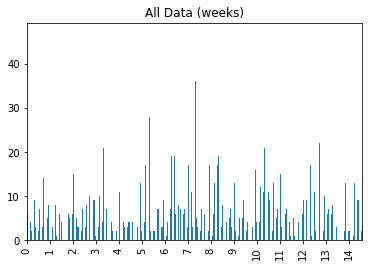

In [175]:
intervals_per_week = 96 * 7 # There are 96 fifteen minute intervals per day.  Multiply by 7 days / week
intervals_in_data = 10080 # This is an overcount so that all labels for x-axis show
ax = interval_df.loc[0:,"count"].plot(x='index', y='count', rot=90, kind="bar", title="All Data (weeks)")
ax.set_xticks(np.arange(0, intervals_in_data, intervals_per_week), minor=False)

<h3>Insight</h3>
Looking at the rise and fall of the data over weeks, it does not appear to be a periodic trend except for a spike often at the end of the week.  There do appear to be relatively large spikes in logins somewhat periodically throughout the time period.

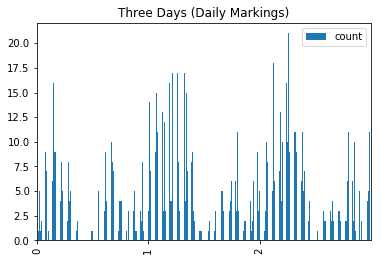

In [176]:
one_day_rows = 96
three_day_rows = one_day_rows * 3
three_day_interval_df = interval_df.loc[0:three_day_rows,"count"]
ax = three_day_interval_df.plot(x="index", y="count", kind="bar", title = "Three Days (Daily Markings)", legend=True)
ax.set_xticks(np.arange(0, 288, 96), minor=False)

<h3>Insight</h3>
In the first three days of the data, it is evident that there is periodic, daily increase in the number of logins.

<h2>Part 2 ‐ Experiment and metrics design</h2>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

<b>1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</b>

The problem statement states that the proposed experiment is "to encourage driver partners to be available in both cities."  The key measure of success, then, would be the percentage of time that the two respective sets of drivers are in both cities.  Ideally, there would be 50% of drivers from one city in the other, and vice versa.  I would choose this metric because it most accurately measures what is described in the problem statement.

<b>2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

i. How you will implement the experiment?

ii. What statistical test(s) you will conduct to verify the significance of the observation?

iii. How you would interpret the results and provide recommendations to the city operations team along with any caveats?</b>

The key measure of success I've described is the percentage of drivers from one city driving in the other city.  Ideally, this would be 50%.  

i. A practical experiment, though not perfect, is to maintain the toll for drivers in one city going to the other.

ii.  I would measure the percentage of drivers from Gotham in Gotham versus Metropolis, and vice versa, both with and without the toll.  I would calculate the average percentage over a series of days and calculate the p-value with and without the toll to verify the significance of the observation.

iii.  I would interpret the results based on the magnitude difference, the significance of the observation.  The following caveats likely exist:
* Their may be more customers in one city compared to another drawing them.  This may have an outsized impact relative to eliminating the toll.
* The customers may prefer the native drivers because they know the roads better.  This again may affect the distribution rather than the toll.

<h3>Part 3 ‐ Predictive Modeling</h3>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

<b>Data description</b>

* <b>city:</b> city this user signed up in
* <b>phone:</b> primary device for this user
* <b>signup_date:</b> date of account registration; in the form ‘YYYYMMDD’
* <b>last_trip_date:</b> the last time this user completed a trip; in the form ‘YYYYMMDD’
* <b>avg_dist:</b> the average distance in miles per trip taken in the first 30 days after signup
* <b>avg_rating_by_driver:</b> the rider’s average rating over all of their trips
* <b>avg_rating_of_driver:</b> the rider’s average rating of their drivers over all of their trips
* <b>surge_pct:</b> the percent of trips taken with surge multiplier > 1
* <b>avg_surge:</b> The average surge multiplier over all of this user’s trips
* <b>trips_in_first_30_days:</b> the number of trips this user took in the first 30 days after signing up
* <b>ultimate_black_user:</b> TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* <b>weekday_pct:</b> the percent of the user’s trips occurring during a weekday

<b> 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? </b>

<b>2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.</b>

<b>3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).</b>

In [177]:
# Data loaded near beginning of file
ultimate_df = pd.DataFrame(ultimate_data)
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [178]:
ultimate_df.loc[:,"signup_date"] = ultimate_df.loc[:,"signup_date"].apply(dateutil.parser.parse)
ultimate_df.loc[:,"last_trip_date"] = ultimate_df.loc[:,"last_trip_date"].apply(dateutil.parser.parse)

In [179]:
present_day = ultimate_df.loc[0, "last_trip_date"]
for row in range(len(ultimate_df)):
    if ultimate_df.loc[row, "last_trip_date"] > present_day:
        present_day = ultimate_df.loc[row, "last_trip_date"]
print(present_day)

2014-07-01 00:00:00


In [180]:
retained_users = 0
thirty_days = datetime.timedelta(days=30)
cutoff_date = present_day - thirty_days
for row in range(len(ultimate_df)):
    if ultimate_df.loc[row, "last_trip_date"] >= cutoff_date:
        retained_users += 1
print(retained_users)

18804


In [181]:
print(len(ultimate_df))

50000


In [182]:
print("Percentage retained users: " + str(float(retained_users)/len(ultimate_df)))

Percentage retained users: 0.37608


In [183]:
for row in range(len(ultimate_df)):
    if ultimate_df.loc[row, "last_trip_date"] >= cutoff_date:
        ultimate_df.loc[row, "retained_user"] = True
    else:
        ultimate_df.loc[row, "retained_user"] = False
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False


In [184]:
mean_rating_of_driver = ultimate_df.loc[:,"avg_rating_of_driver"].mean()
print(mean_rating_of_driver)

4.601559291274655


In [185]:
ultimate_df.loc[:,"avg_rating_of_driver"] = ultimate_df.loc[:,"avg_rating_of_driver"].fillna(mean_rating_of_driver)

In [186]:
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False


In [187]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_dist"].mean()

5.114788342905765

In [188]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_dist"].mean()

6.207938517758687

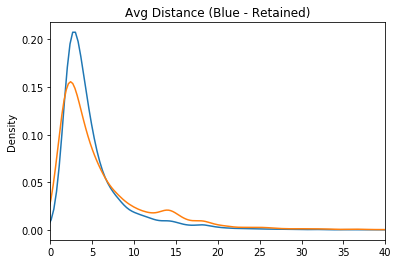

In [189]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_dist"].plot(xlim=(0, 40), kind="kde", title = "Avg Distance (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_dist"].plot(xlim=(0, 40), kind="kde", title = "Avg Distance (Blue - Retained)")
ax2

In [190]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_rating_by_driver"].mean()

4.762771739130435

In [191]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_rating_by_driver"].mean()

4.787464148754472

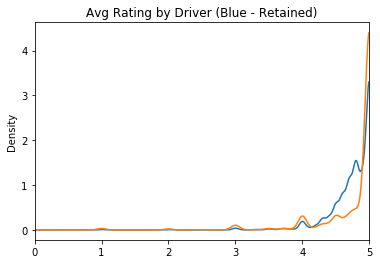

In [192]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_rating_by_driver"].plot(xlim=(0, 5), kind="kde", title = "Avg Rating by Driver (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_rating_by_driver"].plot(xlim=(0, 5), kind="kde", title = "Avg Rating by Driver (Blue - Retained)")
ax2

In [193]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_surge"].mean()

1.0738092958944905

In [194]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_surge"].mean()

1.0753391460443646

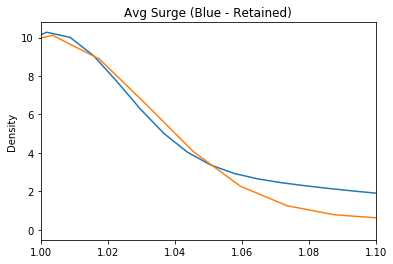

In [195]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_surge"].plot(xlim=(1, 1.1), kind="kde", title = "Avg Surge (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_surge"].plot(xlim=(1, 1.1), kind="kde", title = "Avg Surge (Blue - Retained)")
ax2

In [196]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_rating_of_driver"].mean()

4.593679257783463

In [197]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_rating_of_driver"].mean()

4.60630913579858

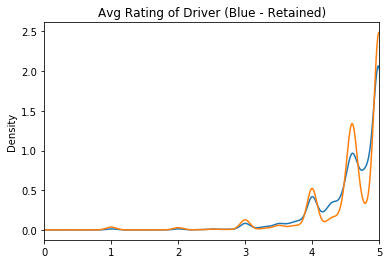

In [198]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"avg_rating_of_driver"].plot(xlim=(0, 5), kind="kde", title = "Avg Rating of Driver (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"avg_rating_of_driver"].plot(xlim=(0, 5), kind="kde", title = "Avg Rating of Driver (Blue - Retained)")
ax2

In [199]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"trips_in_first_30_days"].mean()

3.3063178047223993

In [200]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"trips_in_first_30_days"].mean()

1.6584818566482882

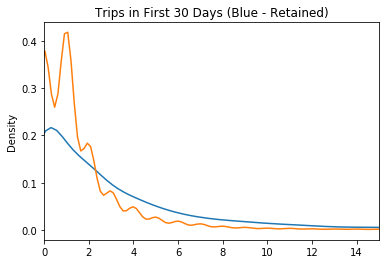

In [201]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"trips_in_first_30_days"].plot(xlim=(0, 15), kind="kde", title = "Trips in First 30 Days (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"trips_in_first_30_days"].plot(xlim=(0, 15), kind="kde", title = "Trips in First 30 Days (Blue - Retained)")
ax2

In [202]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"surge_pct"].mean()

9.15279727717507

In [203]:
ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"surge_pct"].mean()

8.666739325554559

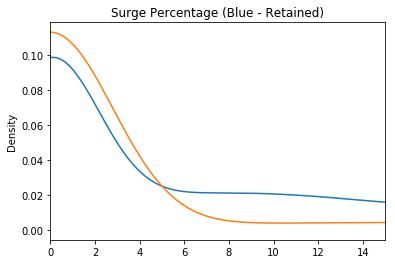

In [204]:
ax1 = ultimate_df[ultimate_df.loc[:,"retained_user"] == True].loc[:,"surge_pct"].plot(xlim=(0, 15), kind="kde", title = "Surge Percentage (Blue - Retained)")
ax2 = ultimate_df[ultimate_df.loc[:,"retained_user"] == False].loc[:,"surge_pct"].plot(xlim=(0, 15), kind="kde", title = "Surge Percentage (Blue - Retained)")
ax2

<h3>Summary Statistics (Averages)</h3>

<table>
    <tr>
        <td> Metric </td>
        <td> Retained </td>
        <td> Not Retained </td>
    <tr>
        <td> Average Distance </td>
        <td> 5.11 </td>
        <td> 6.20 </td>
    </tr>
    <tr>
        <td> Average Rating by Driver </td>
        <td> 4.76 </td>
        <td> 4.78 </td>
    <tr>
        <td> Average Surge </td>
        <td> 1.07 </td>
        <td> 1.08 </td>
    </tr>
    <tr>
        <td> Average Rating of Driver </td>
        <td> 4.59 </td>
        <td> 4.61 </td>
    </tr>
    <tr>
        <td> Trips in First 30 Days </td>
        <td> 3.31 </td>
        <td> 1.66 </td>
    </tr>
    <tr>
        <td> Surge Percentage </td>
        <td> 9.15 </td>
        <td> 8.67 </td>
    </tr>
<table>

In [205]:
retained_cities = {}
not_retained_cities = {}
for row in range(len(ultimate_df)):
    if ultimate_df.loc[row, "city"] not in retained_cities and ultimate_df.loc[row,"retained_user"] == True:
        retained_cities[ultimate_df.loc[row, "city"]] = 1
    elif ultimate_df.loc[row, "city"] in retained_cities and ultimate_df.loc[row,"retained_user"] == True:
        retained_cities[ultimate_df.loc[row, "city"]] += 1
    elif ultimate_df.loc[row, "city"] not in not_retained_cities and ultimate_df.loc[row,"retained_user"] == False:
        not_retained_cities[ultimate_df.loc[row, "city"]] = 1
    else:
        not_retained_cities[ultimate_df.loc[row, "city"]] += 1

In [206]:
retained_cities

{u'Astapor': 4228, u"King's Landing": 6363, u'Winterfell': 8213}

In [207]:
not_retained_cities

{u'Astapor': 12306, u"King's Landing": 3767, u'Winterfell': 15123}

In [208]:
retained_total = 0
for v in retained_cities.values():
    retained_total += v
not_retained_total = 0
for v in not_retained_cities.values():
    not_retained_total += v

In [209]:
normalized_retained_cities = {}
for k, v in retained_cities.items():
    normalized_retained_cities[k] = float(v) / retained_total
    
normalized_not_retained_cities = {}
for k, v in not_retained_cities.items():
    normalized_not_retained_cities[k] = float(v) / not_retained_total

In [210]:
normalized_retained_cities

{u'Astapor': 0.2248457774941502,
 u"King's Landing": 0.33838544990427566,
 u'Winterfell': 0.43676877260157415}

In [211]:
normalized_not_retained_cities

{u'Astapor': 0.3944736504680087,
 u"King's Landing": 0.1207526605975125,
 u'Winterfell': 0.48477368893447875}

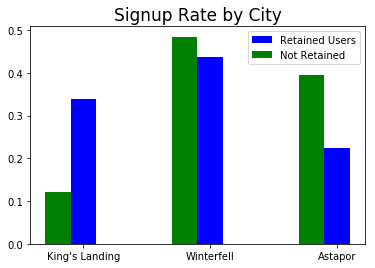

In [212]:
X = np.arange(len(normalized_retained_cities))
ax = plt.subplot(111)
ax.bar(X, normalized_retained_cities.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, normalized_not_retained_cities.values(), width=0.2, color='g', align='center')
ax.legend(('Retained Users','Not Retained'))
plt.xticks(X, normalized_retained_cities.keys())
plt.title("Signup Rate by City", fontsize=17)
plt.show()

In [213]:
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False


<h3>Fill in missing values with averages</h3>

In [214]:
mean_dist = ultimate_df.loc[:,"avg_dist"].mean()
ultimate_df.loc[:,"avg_dist"] = ultimate_df.loc[:,"avg_dist"].fillna(mean_dist)

In [215]:
mean_rating_by_driver = ultimate_df.loc[:,"avg_rating_by_driver"].mean()
ultimate_df.loc[:,"avg_rating_by_driver"] = ultimate_df.loc[:,"avg_rating_by_driver"].fillna(mean_rating_by_driver)

In [216]:
mean_rating_of_driver = ultimate_df.loc[:,"avg_rating_of_driver"].mean()
ultimate_df.loc[:,"avg_rating_of_driver"] = ultimate_df.loc[:,"avg_rating_of_driver"].fillna(mean_rating_of_driver)

In [217]:
mean_surge = ultimate_df.loc[:,"avg_surge"].mean()
ultimate_df.loc[:,"avg_surge"] = ultimate_df.loc[:,"avg_surge"].fillna(mean_surge)

In [218]:
mean_surge_pct = ultimate_df.loc[:,"surge_pct"].mean()
ultimate_df.loc[:,"surge_pct"] = ultimate_df.loc[:,"surge_pct"].fillna(mean_surge_pct)

In [219]:
mean_trips_30 = ultimate_df.loc[:,"trips_in_first_30_days"].mean()
ultimate_df.loc[:,"trips_in_first_30_days"] = ultimate_df.loc[:,"trips_in_first_30_days"].fillna(mean_trips_30)

In [220]:
mean_weekday = ultimate_df.loc[:,"weekday_pct"].mean()
ultimate_df.loc[:,"weekday_pct"] = ultimate_df.loc[:,"weekday_pct"].fillna(mean_weekday)

In [221]:
X = ultimate_df.iloc[:,[0, 1, 2, 3, 8, 9, 10, 11]].values
y = ultimate_df.iloc[:,12].values

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [225]:
y_pred = classifier.predict(X_test)

In [226]:
accuracy_score(y_test, y_pred)

0.70192

In [227]:
dummies_ultimate_df = ultimate_df

In [228]:
dummies_ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False


In [229]:
dummies_ultimate_df['city'] = pd.Categorical(dummies_ultimate_df['city']) # one hot encode the cities

In [230]:
dfDummies = pd.get_dummies(dummies_ultimate_df['city'], prefix = 'city')

In [231]:
dummies_ultimate_df = pd.concat([dummies_ultimate_df, dfDummies], axis=1)

In [232]:
dummies_ultimate_df # note the one-hot encoding at the far right of the table

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True,0,1,0
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False,1,0,0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False,1,0,0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True,0,1,0
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False,0,0,1
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,True,0,0,1
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,False,1,0,0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,False,0,0,1
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,False,0,0,1
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,False,0,0,1


In [233]:
X = dummies_ultimate_df.iloc[:,[0, 1, 2, 3, 8, 9, 10, 11, 13, 14, 15]].values
y = dummies_ultimate_df.iloc[:,12].values

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [235]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [237]:
y_pred = classifier.predict(X_test)

In [238]:
accuracy_score(y_test, y_pred)

0.73352

<h3>Parameter Tuning</h3>

<table>
    <tr>
        <td>Parameters</td>
        <td>Accuracy</td>
    </tr>
    <tr>
        <td>max_depth = None, n_estimators = 10</td>
        <td>73.4%</td>
    </tr>
    <tr>
        <td>max_depth = None, n_estimators = 20</td>
        <td>74.0%</td>
    </tr>
    <tr>
        <td>max_depth = 5, n_estimators = 20</td>
        <td>75.9%</td>
    </tr>
    <tr>
        <td>max_depth = 10, n_estimators = 20</td>
        <td>77.2%</td>
    </tr>
</table>

<h3>Insight</h3>
Including the users' city improves the accuracy of the model from 70.19% to 73.35%.  This is expected from the bar graphs above.  With parameter tuning, the accurace is increased to 77.2%

<h3>Insight</h3>
The percentage of retained users 37.60%.  This means that guessing for every instance that a user is not retained would result in 62.4% accuracy.  Thus, the model improves random guessing by about 24%, to 77.2%.

<h3>Analysis</h3>
The predicted variable is being a retained user, which is used to determine will be active in the sixth month on the system.

The number of trips in first 30 days and average distance showed the most disparity between the two groups.

The random forest classifier provides for classification with high accuracy.  Increasing the number of trees prevents overfitting, and it can handle a large data set that has high dimensionality.

An alternative approach would be to use support vector machine.

The model is valid but relies on information, such as the number of rides in the first 30 days, which is only known after time.

Below are additional indicators of model performance:

In [239]:
print "Train Accuracy :: ", accuracy_score(y_train, classifier.predict(X_train))
print "Test Accuracy  :: ", accuracy_score(y_test, y_pred)
print "Confusion matrix \n", confusion_matrix(y_test, y_pred)

Train Accuracy ::  0.97608
Test Accuracy  ::  0.73352
Confusion matrix 
[[6361 1434]
 [1897 2808]]


<h3>Analysis</h3>
Ultimate might leverage insights from the model by focusing marketing to particular users, such as those from particular cities.  Influencing some factors seems beyond the control of the company, such as the average distance of a ride.  Perhaps ratings, if increased, would impact retention, and there could be promotions to increase the number of rides in the first thirty days.